# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [44]:
# read the titanic train.csv file into a dataframe
df_titanic = pd.read_csv('train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# show the percentage of the passengers that boarded at different ports
df_titanic.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

<AxesSubplot:>

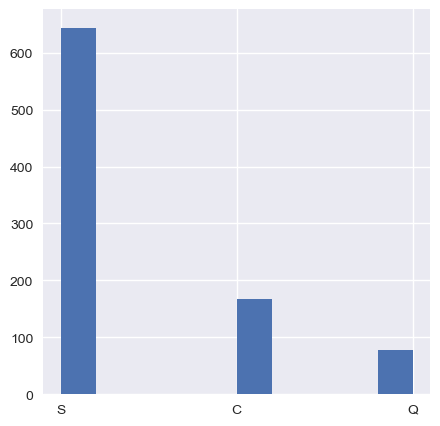

In [46]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
df_titanic['Embarked'].hist(figsize=(5,5))


![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [47]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
survivals = df_titanic[df_titanic.Survived == 1]
survivals.Sex.value_counts(normalize=True)

female    0.681287
male      0.318713
Name: Sex, dtype: float64

Text(0, 0.5, 'Ticket Price')

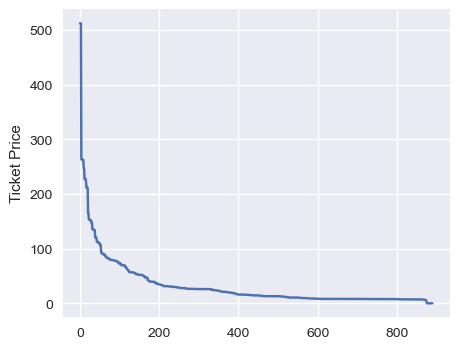

In [48]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
ax = df_titanic.sort_values(by='Fare', ascending=False, ignore_index=True).Fare.plot(figsize=(5,4))
ax.set_ylabel('Ticket Price')


![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



Text(0.5, 0, 'PClass = 3')

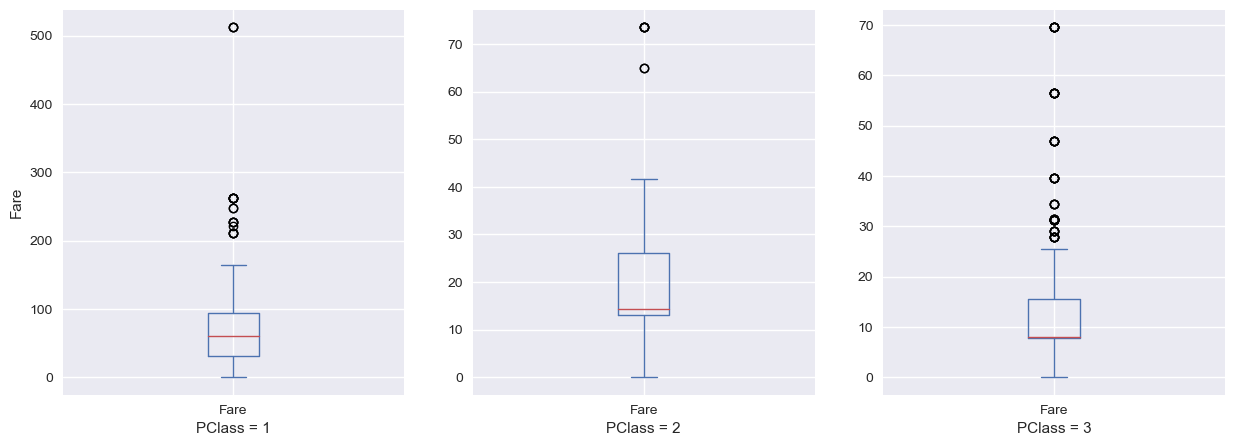

In [49]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
fig, ax = plt.subplots(1,3, figsize=(15,5))
fare_1 = df_titanic[df_titanic.Pclass == 1]
fare_2 = df_titanic[df_titanic.Pclass == 2]
fare_3 = df_titanic[df_titanic.Pclass == 3]
fare_1.Fare.plot.box(ax = ax[0])
fare_2.Fare.plot.box(ax = ax[1])
fare_3.Fare.plot.box(ax = ax[2])

ax[0].set_ylabel('Fare')
ax[0].set_xlabel('PClass = 1')
ax[1].set_xlabel('PClass = 2')
ax[2].set_xlabel('PClass = 3')




![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [50]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
a = df_titanic.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)
print(f'For people with ticket class {a.index[0]}, the survival rate is the highest, which is {100*a[a.index[0]]:.2f}% ')


For people with ticket class 1, the survival rate is the highest, which is 62.96% 


<AxesSubplot:xlabel='Pclass,Survived'>

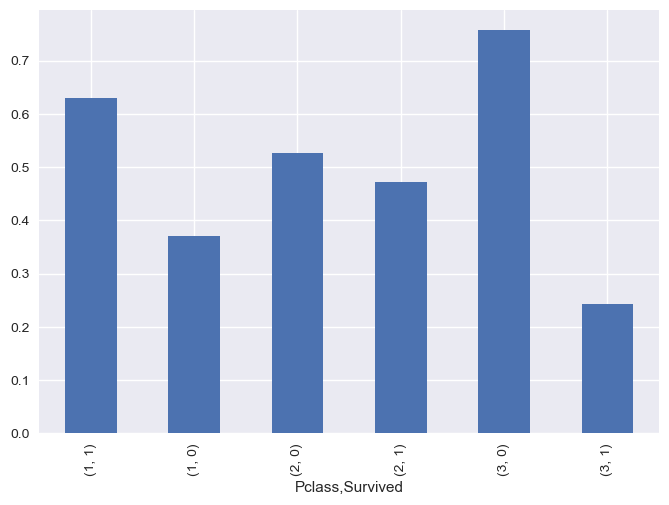

In [51]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
df_titanic.groupby('Pclass')['Survived'].value_counts(normalize=True).plot.bar()

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
